In [1]:
%pylab inline
%gui qt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def _transform(X, P, shift, scale):
    '''
    y = scale*((PX)+shift) 
    '''
    y = (np.dot(X,P) + shift)/scale 
    return y

In [3]:
from spiketag.fpga import xike_config

In [4]:
fpga = xike_config()

In [5]:
_fet = np.fromfile('./fet.bin', dtype=np.int32).reshape(-1, 7)

In [6]:
st = _fet[:, :2]

In [7]:
fet = _fet[:,2:6]

In [8]:
st20  = st[st[:,1]==20]
fet20 = fet[st[:,1]==20]

In [10]:
fet20

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0,

In [9]:
fet20 = fet20.astype(np.float32)

In [10]:
fet20

array([], shape=(0, 4), dtype=float32)

In [11]:
_fet

array([], shape=(0, 7), dtype=int32)

In [12]:
spkfile = np.fromfile('./spk_wav.bin', dtype=np.int32).reshape(-1,20,4)

In [13]:
spkfile[:,0,-1] == 20

array([False, False, False, ..., False, False, False])

In [14]:
spk20 = spkfile[spkfile[:,0,-1] == 20]

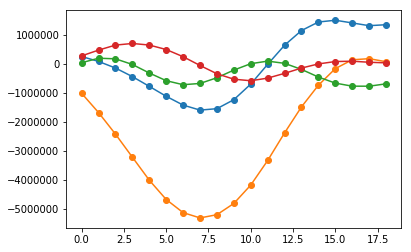

In [15]:
plot(spk20[3][1:, :], '-o')

In [16]:
fet20 = fet20.astype(np.float32)/float(2**16)

In [17]:
fet20

array([], shape=(0, 4), dtype=float32)

## check spk_wav, fet

In [18]:
st20

array([], shape=(0, 2), dtype=int32)

In [19]:
spk20[:, 0, :]

array([[       0,       83,       15,       20],
       [       0,       83,       53,       20],
       [       0,       83,    64508,       20],
       ...,
       [       0,       83, 11661452,       20],
       [       0,       83, 11661807,       20],
       [       0,       83, 11664345,       20]], dtype=int32)

In [20]:
fet20

array([], shape=(0, 4), dtype=float32)

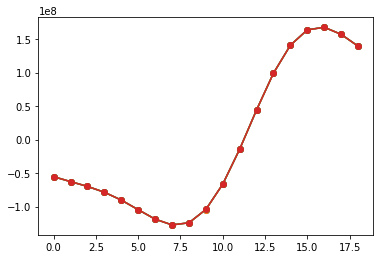

In [21]:
plot(spk20[0][1:,:], '-o')

In [22]:
_fet20_test = _transform(spk20[:, 1:, :].T.reshape(76, -1).T/float(2**13), 
                         fpga.pca[20], 
                         fpga.shift[20], 
                         fpga.scale[20])

In [23]:
np.allclose(fet20[:200], _fet20_test[:200], atol=1e-4)

ValueError: operands could not be broadcast together with shapes (77,4) (87,4) 

In [39]:
from spiketag.view import scatter_3d_view
fet_view = scatter_3d_view()
fet_view.set_data(fet20)
fet_view.show()

In [25]:
fet_test_view = scatter_3d_view()
fet_test_view.set_data(_fet20_test)
fet_test_view.show()